<a href="https://colab.research.google.com/github/Viiiin94/ondevice_ai_python/blob/main/colab/AI_exam08_classfication_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**딥러닝 CNN1**](https://dotiromoook.tistory.com/19)

[**딥러닝 CNN2**](http://taewan.kim/post/cnn/)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten # 뒤에 3개는 CNN이라 불림
from keras.utils import to_categorical

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


26255
8


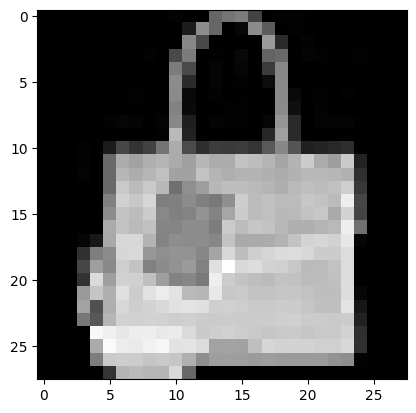

In [ ]:
# 0 ~ 59999의 랜덤 인덱스
my_sample = np.random.randint(0, X_train.shape[0])
print(my_sample)
print(Y_train[my_sample])
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
# print(X_train[my_sample])

In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

In [ ]:
# 위의 숫자를 10개의 인덱스와 같으면 해당 list의 인덱스가 1
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(y_train.shape)
print(y_test.shape)
print(y_train[my_sample])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
x_train = X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)
# print(x_train[5000])
# print(X_train[5000])

In [ ]:
# 색상은 8비트라서 255로 나눔
# 또한 입력값의 범위를 낮추기 위해서 Scaling
x_train = x_train / 255
x_test = x_test / 255
# print(x_train.shape)
# print(x_train[5000])

In [ ]:
from keras.src.ops import MaxPool
model = Sequential()
model.add(Conv2D(32, input_shape=(28, 28, 1), activation='relu',
                 kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, activation='relu', kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,690 (826.91 KB)

 Trainable params: 211,690 (826.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model training 하는 곳
fit_hist = model.fit(x_train,
                     y_train,
                     epochs=15,
                     batch_size=512,
                     validation_split=0.2)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 424ms/step - accuracy: 0.5948 - loss: 1.1764 - val_accuracy: 0.8226 - val_loss: 0.4969
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - accuracy: 0.8309 - loss: 0.4772 - val_accuracy: 0.8526 - val_loss: 0.4119
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.8563 - loss: 0.3992 - val_accuracy: 0.8672 - val_loss: 0.3753
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.8748 - loss: 0.3523 - val_accuracy: 0.8805 - val_loss: 0.3400
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.8788 - loss: 0.3345 - val_accuracy: 0.8807 - val_loss: 0.3334
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 421ms/step - accuracy: 0.8901 - loss: 0.3058 - val_accuracy: 0.8891 - val_loss: 0.3114
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 423ms/step - accuracy: 0.8954 - loss: 0.2910 - val_accuracy: 0.8944 - val_loss: 0.2991
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.8989 - loss: 0.2863 - val_accu

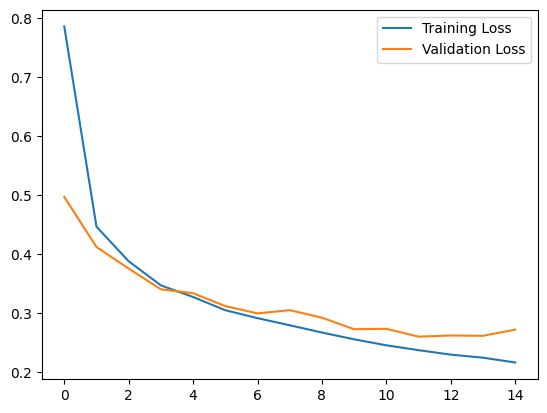

In [ ]:
plt.plot(fit_hist.history['loss'], label='Training Loss')
plt.plot(fit_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

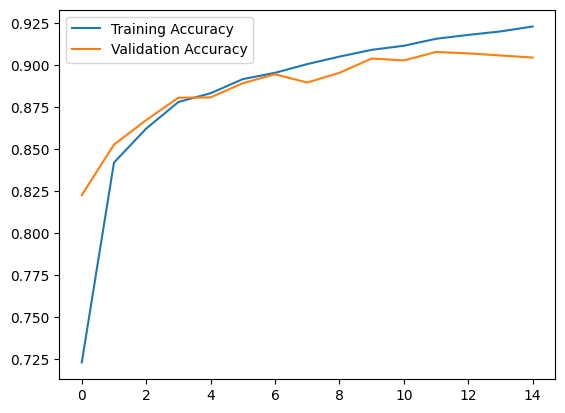

In [ ]:
plt.plot(fit_hist.history['accuracy'], label='Training Accuracy')
plt.plot(fit_hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
print('Final test set accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9027 - loss: 0.2861
Final test set accuracy 0.8986999988555908


actual 0 T-shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[9.9355644e-01 6.6470966e-07 5.9207822e-03 3.3012309e-04 2.1486037e-05
  2.3453204e-08 8.1036582e-05 1.0291067e-09 8.9546586e-05 4.0128829e-09]]
predict 0 T-shirt


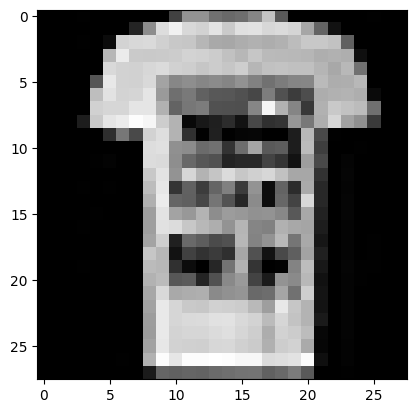

In [ ]:
my_sample = np.random.randint(0, X_test.shape[0])
print('actual', Y_test[my_sample], label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(1, 28, 28, 1))
print(pred)
print('predict', np.argmax(pred), label[np.argmax(pred)])
plt.imshow(X_test[my_sample], cmap='gray')
plt.show()

In [ ]:
!pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.2
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.21
argon2-cffi                        

In [ ]:
!python --version


Python 3.12.12
